In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import glob

In [3]:
def S295(freqs):
    a0 = 1.4866 
    a1 = -0.7871
    a2 = -0.3440
    a3 = 0.0749
    f = freqs * 1.e-9
    logf = np.log10(f)
    logS = a0 + a1*logf + a2*logf**2 + a3*logf**3
    return 10.**(logS)

In [4]:
def get_freqs_pdiode():
    f = fits.open(fnames[0])
    hdu = f[1]
    data = hdu.data['DATA']
    N = 2**14
    df = hdu.data['CDELT1'][0]
    center_freq = hdu.data['CRVAL1'][0]
    centerbin = hdu.data['CRPIX1'][0]
    index = np.arange(N)
    if_freqs = freqstest = index * (-df) # in Hz
    freqs = (center_freq + df * (index + 1 - centerbin))[::-1]
    mask = np.ones(N, dtype=bool)
    mask[(index % 512) == 0] = False
    mask[if_freqs < 150.e6] = False
    mask[if_freqs > 1400.e6] = False  
    mask[(freqs >= 4.225e9) & (freqs <= 4.375e9)] = False
    xxoff = data[::8, ::-1]
    onSoffD = xxoff[200:, mask]
    xxon = data[1::8, ::-1]
    onSonD = xxon[200:, mask]

    f = fits.open(fnames[1])
    hdu = f[1]
    data = hdu.data['DATA']
    N = 2**14
    df = hdu.data['CDELT1'][0]
    center_freq = hdu.data['CRVAL1'][0]
    centerbin = hdu.data['CRPIX1'][0]
    index = np.arange(N)
    if_freqs = freqstest = index * (-df) # in Hz
    freqs = (center_freq + df * (index + 1 - centerbin))[::-1]
    mask = np.ones(N, dtype=bool)
    mask[(index % 512) == 0] = False
    mask[if_freqs < 150.e6] = False
    mask[if_freqs > 1400.e6] = False
    mask[(freqs >= 4.225e9) & (freqs <= 4.375e9)] = False
    xxoff = data[::8, ::-1]
    offSoffD = xxoff[200:, mask]
    xxon = data[1::8, ::-1]
    offSonD = xxon[200:, mask]
  
    Psource = S295(freqs[mask])
    gain = np.nanmean(onSoffD - offSoffD, 0) / Psource
    Pdiode = np.nanmean(offSonD - offSoffD, 0) / gain
    return freqs, Pdiode, mask

In [13]:
fnames = glob.glob('/data2/GBT/3C295/OnOff/scan_03*/scan_03*A.fits')
fnames.sort()
fdiode3, pdiode3, mask3 = get_freqs_pdiode()

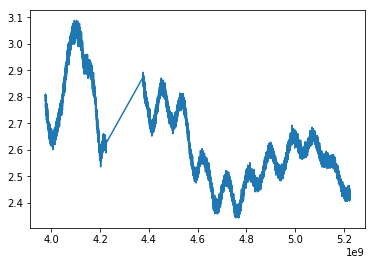

In [14]:
plot(fdiode3[mask3], pdiode3)

In [15]:
fnames = glob.glob('/data2/GBT/3C295/OnOff/scan_05*/scan_05*A.fits')
fnames.sort()
fdiode5, pdiode5, mask5 = get_freqs_pdiode()

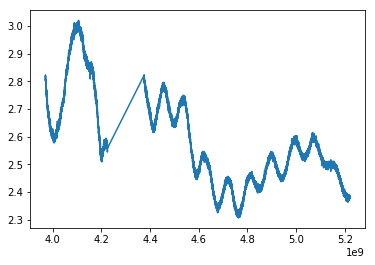

In [17]:
plot(fdiode5[mask5], pdiode5)

In [25]:
fnames = glob.glob('/data2/GBT/S140/Daisy/scan_03*/*A.fits')
fnames.sort()

calibrated3 = [] 
ras3 = []
decs3 = []
meansub3 = []
for fname in fnames:
    f = fits.open(fname)
    hdu = f[1]
    data = hdu.data['DATA']
    ra = hdu.data['CRVAL2'][::8]
    dec = hdu.data['CRVAL3'][::8]
    xxoff = data[::8, ::-1]
    xxon = data[1::8, ::-1]

    gain = pdiode3 / (xxon - xxoff)[:, mask3]
    calibd = xxoff[:, mask3] * gain

    calibrated3 = np.concatenate([calibrated3, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
    meansub3 = np.concatenate([meansub3, np.nanmean(calibd,1) - np.nanmedian(np.nanmean(calibd,1))])
    ras3 = np.concatenate([ras3, ra])
    decs3 = np.concatenate([decs3, dec])

(0, 1)

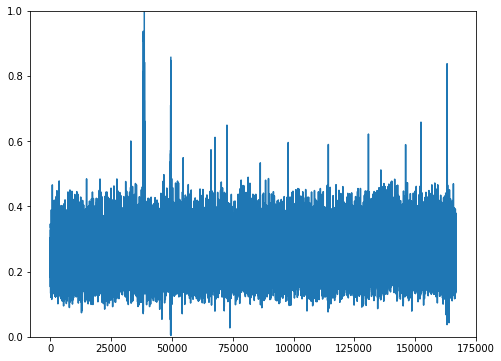

In [170]:
plot(np.abs(calibrated3))
ylim(0, 1)

In [171]:
bad3 = np.abs(calibrated3) > 1.

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [27]:
fnames = glob.glob('/data2/GBT/S140/Daisy/scan_05*/*A.fits')
fnames.sort()

calibrated5 = [] 
ras5 = []
decs5 = []
meansub5 = []
for fname in fnames:
    f = fits.open(fname)
    hdu = f[1]
    data = hdu.data['DATA']
    ra = hdu.data['CRVAL2'][::8]
    dec = hdu.data['CRVAL3'][::8]
    xxoff = data[::8, ::-1]
    xxon = data[1::8, ::-1]

    gain = pdiode5 / (xxon - xxoff)[:, mask5]
    calibd = xxoff[:, mask5] * gain

    calibrated5 = np.concatenate([calibrated5, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
    meansub5 = np.concatenate([meansub5, np.nanmean(calibd,1) - np.nanmedian(np.nanmean(calibd,1))])
    ras5 = np.concatenate([ras5, ra])
    decs5 = np.concatenate([decs5, dec])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: Mean of empty slice
